In [127]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split

def plot_curve(epochs, hist, list_of_metrics,name):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch "+name)
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    
    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,momentum,layers, my_feature_layer,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=15,name='Output', activation = 'softmax'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=my_learning_rate,momentum=momentum),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=my_metrics)
    return model

def create_model_optimizer(hp):
    model = tf.keras.models.Sequential()
    
    
    hp_layers=hp.Int('number_layers', min_value = 2, max_value = 9, step = 1)
    hp_units=[]

    for i in range(hp_layers):
        hp_units.append(hp.Int(str('units'+str(i)), min_value = 5, max_value = 55, step = 5))
        model.add(tf.keras.layers.Dense(units = hp_units[-1], activation = 'relu'))
        
        
        
    hp_lr=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_momentum=hp.Choice('momentum', values=[1e-2, 1e-1, 2e-1,5e-1])

    model.add(tf.keras.layers.Dense(units=15,name='Output', activation = 'relu'))                             
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=hp_lr,momentum=0.2),                                       
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model


def train_model_tuner(model, x,y, epochs, label_name,
                batch_size=None,shuffle=True):
    
    history = model.fit(x=x, y=y, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2)
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist

def train_model(model, dataset, epochs, label_name,
                batch_size=None,shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,dataset,label_name):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    #print(label)
    evaluation=model.evaluate(x = features, y = label, batch_size=batch_size)
    predicted = model.predict(features)
    
    df_test=pd.DataFrame(label,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)


def test_model_tuner(model,x,y,label_name):
    
    evaluation=model.evaluate(x = x, y = y, batch_size=batch_size)
    print(evaluation)
    predicted = model.predict(x)
    
    df_test=pd.DataFrame(y,columns=[label_name])

    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)









In [128]:
#G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data
all_data=pd.read_csv("G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data/first_test_all_param_4_values.csv")





all_data.loc[(all_data['k6a1'] <0) & (all_data['k6a2'] <0)& (all_data['k11'] <0)
                        & (all_data['k12'] <0)& (all_data['k9a1'] <0)&( all_data['k9a2'] <0), 'Class0'] = 1  
all_data.loc[(all_data['k6a1'] >0) & (all_data['k6a2'] >0.5)& (all_data['k11'] >0)
                        & (all_data['k12'] >0)& (all_data['k9a1'] >0)&( all_data['k9a2'] >0), 'Class1'] = 1  

all_data.loc[(all_data['k6a1'] >0) & (all_data['k6a2'] <0)& (all_data['k11'] >0)
                        & (all_data['k12'] <0)& (all_data['k9a1'] >0)&( all_data['k9a2'] <0), 'Class2'] = 1  
all_data.loc[(all_data['k6a1'] <0) & (all_data['k6a2'] >0)& (all_data['k11'] <0)
                        & (all_data['k12'] >0)& (all_data['k9a1'] <0)&( all_data['k9a2'] >0), 'Class3'] = 1  
all_data.loc[(all_data['k6a1'] == all_data['k6a2']), 'Class4'] = 1  
all_data.loc[(all_data['k11'] == all_data['k12']), 'Class5'] = 1  
all_data.loc[(all_data['k9a1'] == all_data['k9a2']), 'Class6'] = 1  
all_data.loc[((all_data['k6a1']+all_data['k11']+all_data['k9a1'])<-0.4 ), 'Class7'] = 1  
all_data.loc[((all_data['k6a1']+all_data['k11']+all_data['k9a1'])>0.4 ), 'Class8'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])<-0.4 ), 'Class9'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])>0.4 ), 'Class10'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])>0.4 ), 'Class10'] = 1  
all_data.loc[(all_data['lambda'] <0.25), 'Class11'] = 1  
all_data.loc[(all_data['lambda'] >=0.25) , 'Class12'] = 1  
all_data.loc[(all_data['delta'] <0.4), 'Class13'] = 1  

all_data.loc[(all_data['delta'] >=0.4) , 'Class14'] = 1  

all_data=all_data.fillna(0)



all_label_list=["k6a1","k6a2","k11","k12","k9a1","k9a2","delta","lambda"]
all_features_list=["main_maximum","no_of_max"]
all_class_features=["Class0","Class1","Class2","Class3","Class4","Class5","Class6","Class7","Class8","Class9","Class10","Class11","Class12","Class13","Class14"]

df_train, df_test = train_test_split(all_data[all_class_features+all_features_list], test_size=0.20, random_state=42)
df_train.head(50)

,Class0,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14,main_maximum,no_of_max
349,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.504,4
29410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.554,4
5224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.530,3
27081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.464,3
2501,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.436,4
2309,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.490,4
20155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.448,3
5825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.564,3
9199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.630,2
32431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.464,4


In [129]:
feature_columns_A = []
main_maximum = tf.feature_column.numeric_column("main_maximum")
feature_columns_A.append(main_maximum)
no_of_max = tf.feature_column.numeric_column("no_of_max")
feature_columns_A.append(no_of_max)

my_feature_layer_A = tf.keras.layers.DenseFeatures(feature_columns_A)

In [130]:
learning_rate = 1e-2
momentum=0.3
epochs = 90
batch_size = 150

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,name='precision'),
      tf.keras.metrics.Recall(thresholds=classification_threshold,name='recall'),]

layers=[16,256,512,64,16]




my_model= create_model2(learning_rate,momentum,layers, my_feature_layer_A,metric,my_act_function="relu")

#lambda_train, lambda_test
#delta_train, delta_test

epochs_run, hist = train_model(my_model, df_train, epochs, 
                          all_class_features, batch_size)


Epoch 1/90

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

141/141 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.8151 - precision: 0.0000e+00 - recall: 0.0000e+0 - ETA: 0s - loss: 0.2294 - accuracy: 0.8115 - precision: 0.0000e+00 - recall: 0.0000e+0 - ETA: 0s - loss: 0.2286 - accuracy: 0.8123 - precision: 0.0000e+00 - recall: 0.0000e+0 - ETA: 0s - loss: 0.2286 - accuracy: 0.8121 - precision: 0.0000e+00 - recall: 0.0000e+0 - ETA: 0s - loss: 0.2285 - accuracy: 0.8119 - precision: 0.0000e+00 - recall: 0.0000e+0 - ETA: 0s - loss

141/141 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.8791 - precision: 1.0000 - recall: 0.355 - ETA: 0s - loss: 0.1264 - accuracy: 0.8798 - precision: 1.0000 - recall: 0.356 - ETA: 0s - loss: 0.1273 - accuracy: 0.8788 - precision: 1.0000 - recall: 0.354 - ETA: 0s - loss: 0.1267 - accuracy: 0.8791 - precision: 1.0000 - recall: 0.355 - ETA: 0s - loss: 0.1266 - accuracy: 0.8790 - precision: 1.0000 - recall: 0.355 - ETA: 0s - loss: 0.1264 - accuracy: 0.8790 - precision: 1.0000 - recall: 0.355 - 0s 3ms/step - loss: 0.1264 - accuracy: 0.8789 - precision: 1.0000 - recall: 0.3550 - val_loss: 0.1244 - val_accuracy: 0.8799 - val_precision: 1.0000 - val_recall: 0.3569
Epoch 12/90
141/141 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.8858 - precision: 1.0000 - recall: 0.368 - ETA: 0s - loss: 0.1260 - accuracy: 0.8779 - precision: 1.0000 - recall: 0.353 - ETA: 0s - loss: 0.1257 - accuracy: 0.8782 - precision: 1.0000 - recall: 0.353 - ETA: 0s - lo

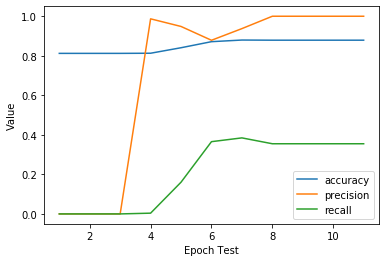

In [131]:
# Plot a graph of the metric(s) vs. epochs.
#list_of_metrics_to_plot = ['accuracy'] 
#print(hist_delta.head())
#list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
list_of_metrics_to_plot = ['accuracy', 'precision', 'recall'] 

plot_curve(epochs_run, hist, list_of_metrics_to_plot,"Test")


In [ ]:
delta_test_result=test_model(my_model,df_test,all_class_features)

import seaborn as sn
import matplotlib.pyplot as plt

g = sn.PairGrid(delta_test_result)
g.map(sn.scatterplot)
#corr = delta_test_result.corr()
#sn.heatmap(corr, annot=False)
#plt.show()


In [133]:
delta_test_result.head(50)

,"(Class0,)","(Class1,)","(Class2,)","(Class3,)","(Class4,)","(Class5,)","(Class6,)","(Class7,)","(Class8,)","(Class9,)",...,Class5_pred,Class6_pred,Class7_pred,Class8_pred,Class9_pred,Class10_pred,Class11_pred,Class12_pred,Class13_pred,Class14_pred
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.755059e-05,0.000521,8.141383e-06,3.541847e-06,7.761871e-07,7.214338e-06,0.002331,0.000347,0.000213,0.995447
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,9.519509e-07,0.000068,3.471546e-07,1.185260e-07,1.732806e-08,3.024476e-07,0.000466,0.000041,0.000022,0.999263
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.385420e-04,0.003992,1.976618e-04,1.098970e-04,3.600255e-05,1.785255e-04,0.011724,0.003013,0.002049,0.968958
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.857454e-03,0.026124,4.195556e-03,2.997211e-03,1.493370e-03,3.911654e-03,0.050792,0.022458,0.017094,0.790404
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.318692e-07,0.000067,3.402928e-07,1.160979e-07,1.696543e-08,2.968494e-07,0.000462,0.000040,0.000022,0.999270
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.461588e-04,0.004006,2.020328e-04,1.117673e-04,3.685644e-05,1.815366e-04,0.011810,0.003030,0.002060,0.968772
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.463034e-04,0.004006,2.020943e-04,1.118006e-04,3.687078e-05,1.815985e-04,0.011811,0.003031,0.002060,0.968767
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.756413e-05,0.000521,8.146812e-06,3.543935e-06,7.767765e-07,7.219003e-06,0.002332,0.000347,0.000213,0.995446
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,9.099937e-07,0.000067,3.333115e-07,1.136188e-07,1.659867e-08,2.909760e-07,0.000458,0.000040,0.000022,0.999276
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,9.578380e-07,0.000068,3.492871e-07,1.192714e-07,1.743959e-08,3.041833e-07,0.000468,0.000041,0.000023,0.999260


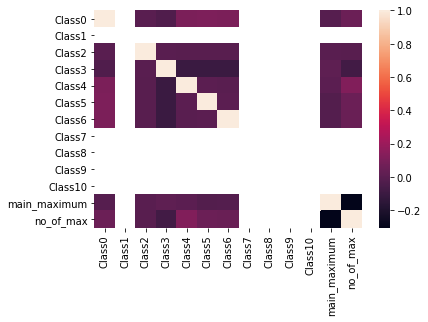

In [85]:
import seaborn as sn
import matplotlib.pyplot as plt



corr = df_train.corr()
sn.heatmap(corr, annot=False)
plt.show()